In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [3]:
import glob

In [ ]:
#def load_files():
#for file in (glob.glob("data/*.csv")):
        
    
    

In [26]:
with open("data/2011 Stack Overflow Survey Results.csv", 'rb') as f:
    result_2011 = chardet.detect(f.read())

with open("data/2012 Stack Overflow Survey Results.csv", 'rb') as f:
    result_2012 = chardet.detect(f.read())

In [17]:
#pd.read_csv("data\\2011 Stack Overflow Survey Results.csv" , encoding = result_2011['encoding'], low_memory=False)

In [41]:
data_2011 = pd.read_csv("data/2011 Stack Overflow Survey Results.csv", encoding = result_2011['encoding'], low_memory=False)
data_2012 = pd.read_csv("data/2012 Stack Overflow Survey Results.csv", encoding = result_2012['encoding'], low_memory=False)
data_2013 = pd.read_csv("data/2013 Stack Overflow Survey Results.csv", low_memory=False)
data_2014 = pd.read_csv("data/2014 Stack Overflow Survey Results.csv", low_memory=False)
data_2015 = pd.read_csv("data/2015 Stack Overflow Survey Results.csv", header=1, low_memory=False)
data_2016 = pd.read_csv("data/2016 Stack Overflow Survey Results.csv", low_memory=False)

In [19]:
data_2019 = pd.read_csv("data/2019 Stack Overflow Survey Results.csv" , low_memory=False)
data_2018 = pd.read_csv("data/2018 Stack Overflow Survey Results.csv" , low_memory=False)
data_2017 = pd.read_csv("data/2017 Stack Overflow Survey Results.csv" , low_memory=False)

# Popularity of programming languages over the years

In [295]:
def clean_pop_lng(series,year):
    l = series.fillna("Nil").apply(lambda x : x.split(";")).to_list()
    flat_list = [item for sublist in l for item in sublist]
    df = pd.DataFrame(pd.Series(flat_list).value_counts().head(2),columns =["Count"]).reset_index().rename(columns={"index":"Language"})
    df.drop(df[df['Language'] == "Nil" ].index , inplace=True)
    df["Year"] = year
    return (df)

def clean_pop_lng2(dataframe,columns,year,passs =False):
    df = pd.DataFrame(columns = ["Count"])
    for col in columns:
        if "Current Lang & Tech:" in col or passs ==True:
            dict_lang = dataframe[col].value_counts().to_dict()
            df.loc[list(dict_lang.keys())[0]] = dict_lang[list(dict_lang.keys())[0]]
    df = df.sort_values(by = "Count" ,ascending =False).reset_index().rename(columns={"index":"Language"}) 
    df["Year"] = year
    return(df.head(2))

def clean_pop_lng3(x):
    if "JavaScript" in x:
        return "JavaScript"
    if "Java" in x:
        return "Java"
    if "SQL" in x:
        return "SQL"
    if "HTML" in x or "CSS" in x:
        return "HTML/CSS"
    else:
        return x

most_pop_lng_df = pd.DataFrame(columns=["Language","Count","Year"])

most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng(data_2019.LanguageWorkedWith,2019)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng(data_2018.LanguageWorkedWith,2018)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng(data_2017.HaveWorkedLanguage,2017)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng(data_2016.tech_do,2016)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2015,data_2015.columns,2015)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2014,data_2014.iloc[:,42:54].columns,2014,True)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2013,data_2013.iloc[:,56:69].columns,2013,True)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2012,data_2012.iloc[:,22:35].columns,2012,True)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2011,data_2011.iloc[:,30:41].columns,2011,True)])

most_pop_lng_df.reset_index(drop =True,inplace =True)
most_pop_lng_df.Language = most_pop_lng_df.Language.apply(clean_pop_lng3)
most_pop_lng_df

,Language,Count,Year
0,JavaScript,59219,2019
1,HTML/CSS,55466,2019
2,JavaScript,54686,2018
3,HTML/CSS,53628,2018
4,SQL,18466,2017
5,JavaScript,17159,2017
6,JavaScript,22606,2016
7,SQL,21664,2016
8,JavaScript,11962,2015
9,SQL,9439,2015


In [ ]:
most_pop_lng_df.groupby()

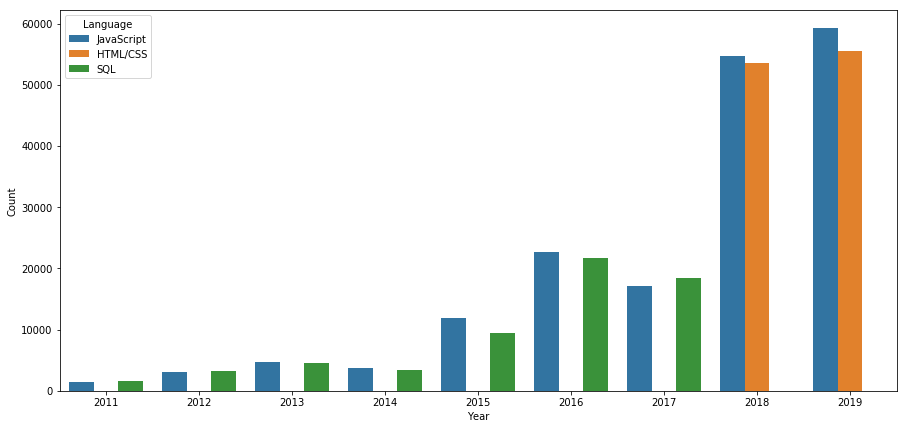

In [296]:
plt.figure(figsize =(15,7))
sns.barplot(x =most_pop_lng_df.Year ,y =most_pop_lng_df.Count ,hue=most_pop_lng_df.Language )
plt.show()

In [ ]:
fig, ax = plt.subplots()